# Exercise on geometry in Union
When using the Union components, physics and geometry are separated into different components. The physics are described with process components which are collected into material definitions. This exercise focuses on the geometry aspect and will teach you how to build complex geometries from the simple shapes available. First a few questions to get started.

In [1]:
import load_quiz
quiz = load_quiz.exercise_2()

### Question 1

Which statement about geometry components below is true?

- A: Geometry components can take multiple material definitions
- B: Geometry components are optional for running a Union simulation
- C: The position and rotation of geometry components are important
- D: The geometry component performs the simulation

In [2]:
quiz.question_1()

Correct!
Yes, the geometry component describes something physical which is placed in
space.


### Question 2

Does the placement of the geometry components in the instrument file matter?

- A: Not at all, they can be wherever in the instrument
- B: Slightly, they have to be after their material and before their master
- C: Yes, the rays will interact with them in the given order

In [3]:
quiz.question_2()

Correct!
Yes, but their order does not matter, they will all be simulated.


### Question 3

What is the purpose of the priority parameter?

- A: To select which of two overlapping geometries to simulate in overlapping region
- B: To select how important a geometry is and assign statistics accordingly
- C: To hide a geometry component when drawing the instrument
- D: To disable or enable a geometry

In [4]:
quiz.question_3()

Correct!
Yes, the one with highest priority is simulated in the overlapping region


## Build an imaging subject
The exercise provides a simple imaging instrument with a few material definitions, and you will build the geometry to be imaged. First we load McStasScript and setup an instrument!

In [5]:
import mcstasscript as ms

instrument = ms.McStas_instr("exercise_2", input_path="run_folder")
instrument.settings(output_path="data_folder/exercise_2")

# Necessary for current version of Union in McStas 3.X
init = instrument.add_component("init", "Union_init")

## Imaging instrument
Here the simple imaging instrument is added with two different materials, Aluminium and SiO2 (quartz).

In [6]:
Al_inc = instrument.add_component("Al_inc", "Incoherent_process")
Al_inc.sigma = 4*0.0082 # 4 atoms per unit cell
Al_inc.unit_cell_volume = 66.4

Al_pow = instrument.add_component("Al_pow", "Powder_process")
Al_pow.reflections = '"Al.laz"'

Al = instrument.add_component("Al", "Union_make_material")
Al.process_string = '"Al_inc,Al_pow"'
Al.my_absorption = 100*4*0.231/66.4 # barns [m^2 E-28]*Å^3 [m^3 E-30]=[m E-2]

SiO2_inc = instrument.add_component("SiO2_inc", "Incoherent_process")
SiO2_inc.sigma = 3*0.0056 # 4 atoms per unit cell
SiO2_inc.unit_cell_volume = 112.35

SiO2_pow = instrument.add_component("SiO2_pow", "Powder_process")
SiO2_pow.reflections = '"SiO2_quartza.laz"'

SiO2 = instrument.add_component("SiO2", "Union_make_material")
SiO2.process_string = '"SiO2_inc,SiO2_pow"'
SiO2.my_absorption = 100*3*0.1714/112.35 # barns [m^2 E-28]*Å^3 [m^3 E-30]=[m E-2]

source = instrument.add_component("source", "Source_simple")
source.set_parameters(radius=0.01, focus_xw=0.2, focus_yh=0.2, dist=10, flux=1E9)
instrument.add_parameter("double", "wavelength", value=6.0, comment="[AA]  Mean wavelength of neutrons")
instrument.add_parameter("double", "d_wavelength", value=3.0, comment="[AA]  Wavelength spread of neutrons")
source.lambda0 = "wavelength"
source.dlambda = "d_wavelength"

sample_rotation = instrument.add_parameter("sample_rotation", value=0, comment="Rotation of sample [deg]")
sample_position = instrument.add_component("sample_position", "Arm")
sample_position.set_AT(9.5, RELATIVE=source)
sample_position.set_ROTATED([0, sample_rotation, 0], RELATIVE=source)

PSD = instrument.add_component("detector", "PSD_monitor")
PSD.set_parameters(xwidth=0.2, yheight=0.2, filename='"PSD.dat"', nx=250, ny=250)
PSD.set_AT(10, RELATIVE=source)

### Question 4 - Add a box
The imaging instrument includes the sample position and the detector, we will place our union geometry components and the master between these. First add a Union_box at the sample position with the following properties:
- Width of 16 cm
- Height of 9 cm
- Depth of 7 cm
- Material Al

In [7]:
# Your code here

In [8]:
quiz.question_4(instrument)

Correct!
The Union_box component was found with the right properties


### Question 5
Add a Union_master component after the box.

In [9]:
# Your code here

In [10]:
quiz.question_5(instrument)

Correct!
The Union_master component was found with the right properties


### Question 6
In the current version of the Union components on McStas 3.X it is necessary to add a Union_stop component after all Union components, add one to the end of the instrument.

In [11]:
# Your code here

In [12]:
quiz.question_6(instrument)

Correct!
The Union_stop component was found with the right properties


### Check the diagram

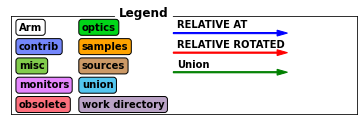

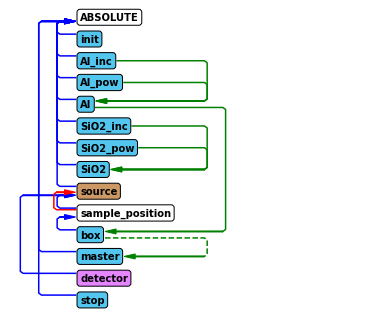

In [13]:
instrument.show_diagram()

### Run the simulation
Now all the required pieces are added to the instrument, processes assembled into materials, a geometry and a master component.

In [14]:
import mcstasscript.jb_interface as ms_widget
%matplotlib widget

In [15]:
ms_widget.show(instrument)

### Question 7 - Hollow out the box
Now we will use the ability of geometry components to overlap to create a opening in the top of the box. Add a second box called "box_vacuum" before the master component. The width and depth should be smaller such that the wall thickness of the hollow box is 1 cm. The bottom should also be 1 cm, place the box_vacuum relative to the box such that this is the case.

In [16]:
# Your code here

In [17]:
quiz.question_7(instrument)

Correct!
The Union_box component was found with the right properties
Correct!
The box_vacuum was added correctly and hollows out the box!


### Run the experiment again
You can now see the effect of the hollowed out box by running the simulation.

In [18]:
ms_widget.show(instrument)

### Question 8 - Add a few marbles
Add a few marbles to you box, these should be Union_sphere components placed relative to "box_vacuum" and be inside the hollow part of the box. Have your marbles use the "SiO2" material definition.

In [20]:
# Your code here

In [21]:
quiz.question_8(instrument)

Correct!
Found 3 marbles with appropriate properties, great! You still have all your
marbles!


### Run the experiment again
You should now be able to see your marbles in the box!

In [22]:
ms_widget.show(instrument)

### Question 9
Does the simulation allow a ray to scatter in all the marbles?

- A: Yes, and the box too
- B: No, the ray can only scatter in one of the geometries

In [23]:
quiz.question_9()

Correct!
Yes, multiple scattering between all geometries is always simulated with Union
components


### Bonus
If you have more time, add more geometries to the box, such as the Union_cylinder or Union_cone. 